In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load wins data

In [2]:
wins = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2023_advanced.html#advanced_stats")[0]
wins.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,C,23,TOR,55,1140,15.2,.554,.267,...,NaN,0.8,1.4,2.2,.093,NaN,-1.4,-0.8,-2.3,-0.1
1,2,Steven Adams,C,29,MEM,42,1133,17.5,.564,.004,...,NaN,1.3,2.1,3.4,.144,NaN,-0.3,0.9,0.6,0.7
2,3,Bam Adebayo,C,25,MIA,75,2598,20.1,.592,.011,...,NaN,3.6,3.8,7.4,.137,NaN,0.8,0.8,1.5,2.3
3,4,Ochai Agbaji,SG,22,UTA,59,1209,9.5,.561,.591,...,NaN,0.9,0.4,1.3,.053,NaN,-1.7,-1.4,-3.0,-0.3
4,5,Santi Aldama,PF,22,MEM,77,1682,13.9,.591,.507,...,NaN,2.1,2.4,4.6,.130,NaN,-0.3,0.8,0.5,1.1


**Quick Data Manip**

In [3]:
wins = wins[['Player', 'WS']]
wins['WS'] = pd.to_numeric(wins['WS'], errors='coerce')  # Convert 'EW' column to numeric
wins.head()

,Player,WS
0,Precious Achiuwa,2.2
1,Steven Adams,3.4
2,Bam Adebayo,7.4
3,Ochai Agbaji,1.3
4,Santi Aldama,4.6


**Quick Viz**

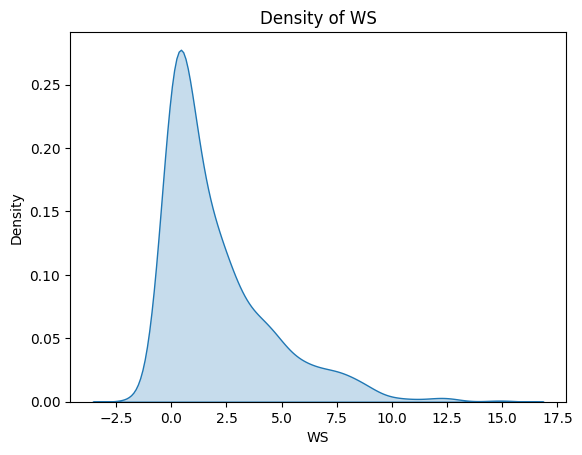

In [4]:
# Plot the density of 'EW' using Seaborn
sns.kdeplot(data=wins, x='WS', fill=True)

# Add labels and title
plt.xlabel('WS')
plt.ylabel('Density')
plt.title('Density of WS')

# Show the plot
plt.show()

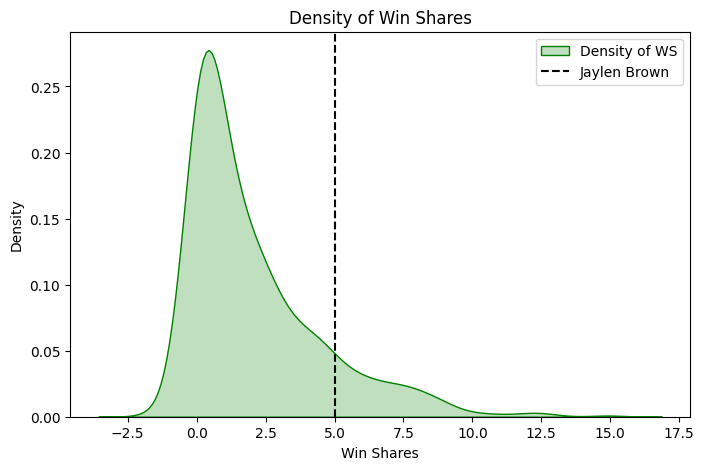

In [5]:
# Clean the 'Player' and 'WS' columns
wins['Player'] = wins['Player'].str.split().str[:2].str.join(' ')
wins['WS'] = pd.to_numeric(wins['WS'], errors='coerce')  # Convert 'WS' column to numeric, invalid values become NaN

# Get 'Jaylen Brown' WS value
jaylen_ws = wins.loc[wins['Player'] == 'Jaylen Brown', 'WS'].iloc[0]

# Plot the density using Seaborn with custom colors for 'WS' values above and below 'Jaylen Brown'
plt.figure(figsize=(8, 5))
sns.kdeplot(data=wins, x='WS', fill=True, color='green', label='Density of WS')

# Add vertical lines to highlight Jaylen Brown's position
plt.axvline(x=jaylen_ws, color='black', linestyle='--', label='Jaylen Brown')

# Add labels and title
plt.xlabel('Win Shares')
plt.ylabel('Density')
plt.title('Density of Win Shares')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Load Salary Data

In [6]:
salary = pd.read_html("https://www.basketball-reference.com/contracts/players.html#player-contracts")[0]
salary.columns = salary.columns.droplevel(0)
salary.head()

,Rk,Player,Tm,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29,Guaranteed
0,1,LeBron James,LAL,"$53,369,986","$57,639,585",NaN,NaN,NaN,NaN,"$53,369,986"
1,2,Stephen Curry,GSW,"$51,915,615","$55,761,216","$59,606,817",NaN,NaN,NaN,"$167,283,648"
2,3,Kevin Durant,PHO,"$47,649,433","$51,179,021","$54,708,609",NaN,NaN,NaN,"$153,537,063"
3,4,Nikola Jokić,DEN,"$46,900,000","$50,652,000","$54,404,000","$58,156,000","$61,908,000",NaN,"$210,112,000"
4,5,Joel Embiid,PHI,"$46,900,000","$50,652,000","$54,404,000","$58,156,000",NaN,NaN,"$151,956,000"


**Data Manip**

In [7]:
salary = salary[['Player', '2023-24']]
salary.loc[:, '2023-24'] = pd.to_numeric(salary['2023-24'].str.replace('[\$,]', '', regex=True), errors='coerce')
salary['2023-24'] = salary['2023-24'] / 10**6
salary.head()

<ipython-input-7-a0e76d1c0677>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary.loc[:, '2023-24'] = pd.to_numeric(salary['2023-24'].str.replace('[\$,]', '', regex=True), errors='coerce')
<ipython-input-7-a0e76d1c0677>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  salary.loc[:, '2023-24'] = pd.to_numeric(salary['2023-24'].str.replace('[\$,]', '', regex=True), errors='coerce')
<ipython-input-7-a0e76d1c0677>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Player,2023-24
0,LeBron James,53.369986
1,Stephen Curry,51.915615
2,Kevin Durant,47.649433
3,Nikola Jokić,46.900000
4,Joel Embiid,46.900000


**Quick Viz**

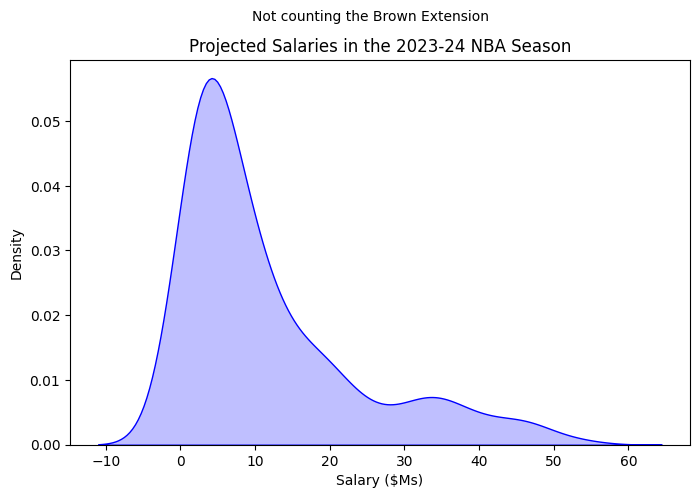

In [8]:
# Plot the density using Seaborn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=salary, x='2023-24', fill=True, color='blue', label='Salary Density')

# Add title and subtitle
plt.title('Projected Salaries in the 2023-24 NBA Season')
plt.suptitle('Not counting the Brown Extension', fontsize=10)

# Add xlabel
plt.xlabel('Salary ($Ms)')

# Show the plot
plt.show()

# HoopsHype Salary Data

The code in this subsection is not well written, the goal was to just produce something that "worked" in order to generate article visuals.

In [9]:
df_24 = pd.read_html("https://hoopshype.com/salaries/players/")[0]
df_17 = pd.read_html("https://hoopshype.com/salaries/players/2016-2017/")[0]
df_15 = pd.read_html("https://hoopshype.com/salaries/players/2014-2015/")[0]

In [10]:
df_17 = df_17[['Player', '2016/17']]
df_17.loc[:, '2016/17'] = pd.to_numeric(df_17['2016/17'].str.replace('[\$,]', '', regex=True), errors='coerce')
df_17['Salary'] = df_17['2016/17'] / 10**6
df_17.head()

<ipython-input-10-1fb1a3d0197f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17.loc[:, '2016/17'] = pd.to_numeric(df_17['2016/17'].str.replace('[\$,]', '', regex=True), errors='coerce')
<ipython-input-10-1fb1a3d0197f>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_17.loc[:, '2016/17'] = pd.to_numeric(df_17['2016/17'].str.replace('[\$,]', '', regex=True), errors='coerce')
<ipython-input-10-1fb1a3d0197f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Player,2016/17,Salary
0,LeBron James,30963450,30.96345
1,Al Horford,26540100,26.54010
2,Kevin Durant,26540100,26.54010
3,James Harden,26540100,26.54010
4,Mike Conley,26540100,26.54010


In [11]:
df_15 = df_15[['Player', '2014/15']]
df_15.loc[:, '2014/15'] = pd.to_numeric(df_15['2014/15'].str.replace('[\$,]', '', regex=True), errors='coerce')
df_15['Salary'] = df_15['2014/15'] / 10**6
df_15.head()

<ipython-input-11-b02108af753a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_15.loc[:, '2014/15'] = pd.to_numeric(df_15['2014/15'].str.replace('[\$,]', '', regex=True), errors='coerce')


,Player,2014/15,Salary
0,Kobe Bryant,23500000,23.500000
1,Joe Johnson,23180790,23.180790
2,Carmelo Anthony,22458401,22.458401
3,Amare Stoudemire,21896658,21.896658
4,Dwight Howard,21436271,21.436271


In [12]:
df_24 = df_24[['Player', '2023/24']]
df_24.loc[:, '2023/24'] = pd.to_numeric(df_24['2023/24'].str.replace('[\$,]', '', regex=True), errors='coerce')
df_24['Salary'] = df_24['2023/24'] / 10**6
df_24.head()

<ipython-input-12-ccc250e20179>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24.loc[:, '2023/24'] = pd.to_numeric(df_24['2023/24'].str.replace('[\$,]', '', regex=True), errors='coerce')
<ipython-input-12-ccc250e20179>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_24.loc[:, '2023/24'] = pd.to_numeric(df_24['2023/24'].str.replace('[\$,]', '', regex=True), errors='coerce')
<ipython-input-12-ccc250e20179>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Player,2023/24,Salary
0,Stephen Curry,51915615,51.915615
1,Kevin Durant,47649433,47.649433
2,Nikola Jokic,47607350,47.607350
3,LeBron James,47607350,47.607350
4,Joel Embiid,47607350,47.607350


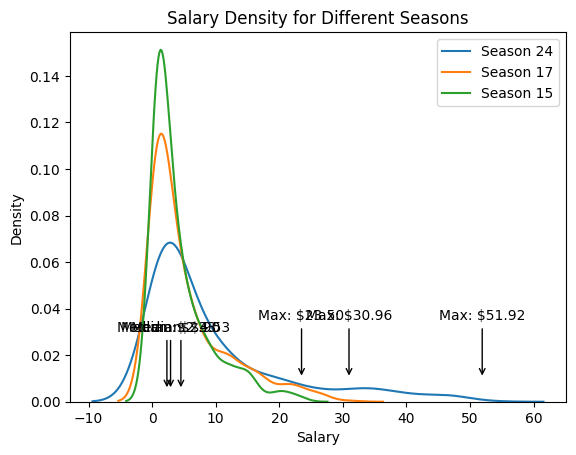

In [13]:
# Set up the figure and axes
fig, ax = plt.subplots()

# Plot density for df_24
sns.kdeplot(data=df_24, x='Salary', label='Season 24', ax=ax)

# Plot density for df_17
sns.kdeplot(data=df_17, x='Salary', label='Season 17', ax=ax)

# Plot density for df_15
sns.kdeplot(data=df_15, x='Salary', label='Season 15', ax=ax)

# Compute and annotate median salary for each season
for df, label in zip([df_24, df_17, df_15], ['Season 24', 'Season 17', 'Season 15']):
    median_salary = df['Salary'].median()
    ax.annotate(f'Median: ${median_salary:.2f}', xy=(median_salary, 0.005), xytext=(median_salary, 0.03),
                arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

    max_salary = df['Salary'].max()
    ax.annotate(f'Max: ${max_salary:.2f}', xy=(max_salary, 0.01), xytext=(max_salary, 0.035),
                arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

# Set labels and title
ax.set_xlabel('Salary')
ax.set_ylabel('Density')
ax.set_title('Salary Density for Different Seasons')

# Show legend
ax.legend()

# Display the plot
plt.show()


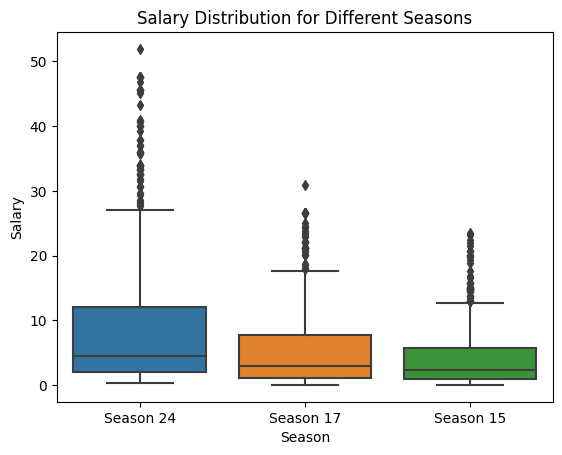

In [14]:
# Combine the DataFrames into a single DataFrame with a new 'Season' column
df_24['Season'] = 'Season 24'
df_17['Season'] = 'Season 17'
df_15['Season'] = 'Season 15'
combined_df = pd.concat([df_24, df_17, df_15])

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the box plot
sns.boxplot(data=combined_df, x='Season', y='Salary', ax=ax)

# Set labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Salary')
ax.set_title('Salary Distribution for Different Seasons')

# Display the plot
plt.show()

In [15]:
# Add a new column 'Season' to each DataFrame
df_24['Season'] = '2023-24'
df_17['Season'] = '2016-17'
df_15['Season'] = '2014-15'

# Combine all three DataFrames vertically
df_combined = pd.concat([df_24[['Season', 'Salary']], df_17[['Season', 'Salary']], df_15[['Season', 'Salary']]])

# Export the combined DataFrame to a CSV file
output_csv_file = 'combined_salaries.csv'
df_combined.to_csv(output_csv_file, index=False)

print("Data saved to CSV:", output_csv_file)

Data saved to CSV: combined_salaries.csv


In [16]:
df_combined.head()

,Season,Salary
0,2023-24,51.915615
1,2023-24,47.649433
2,2023-24,47.607350
3,2023-24,47.607350
4,2023-24,47.607350


# Merging Salary & Win Data

In [17]:
# Merge the DataFrames on the 'Player' column
df = pd.merge(salary, wins, on='Player')
df = df.dropna()
df.head()

,Player,2023-24,WS
0,LeBron James,53.369986,5.6
1,Stephen Curry,51.915615,7.8
2,Kevin Durant,47.649433,6.8
3,Kevin Durant,47.649433,5.7
4,Kevin Durant,47.649433,1.1


This subsection was additional analysis done on my part to check correlations, but the data is inconsequential because of Win Share's unreliability as a metric

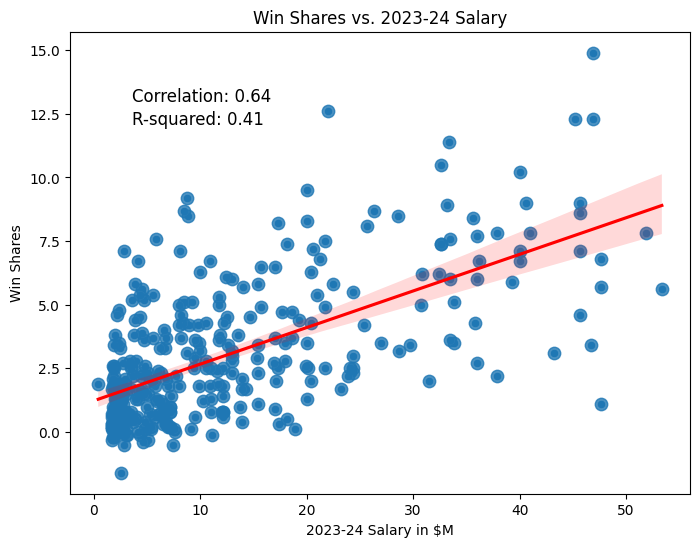

In [18]:
from scipy.stats import pearsonr

# Create the scatter plot with log scale on x-axis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='2023-24', y='WS')

# Calculate correlation coefficient and R-squared
corr_coef, _ = pearsonr(df['2023-24'], df['WS'])
r_squared = corr_coef**2

# Add correlation coefficient and R-squared as annotations
plt.annotate(f'Correlation: {corr_coef:.2f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate(f'R-squared: {r_squared:.2f}', xy=(0.1, 0.80), xycoords='axes fraction', fontsize=12)

# Add the regression line
sns.regplot(data=df, x='2023-24', y='WS', scatter_kws={'s': 80}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Win Shares vs. 2023-24 Salary')
plt.xlabel('2023-24 Salary in $M')
plt.ylabel('Win Shares')

# Show the plot
plt.show()

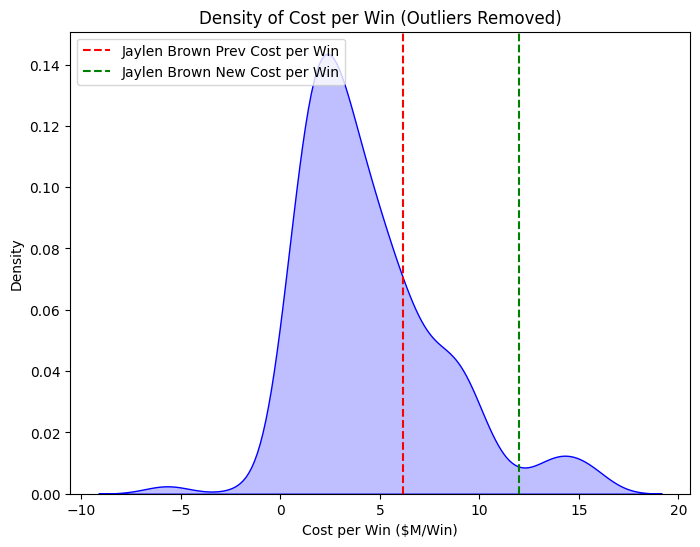

In [19]:
# Calculate cost per win
df['Cost_Per_Win'] = df['2023-24'] / df['WS']

# Remove outliers from Cost_Per_Win (you can adjust the outlier removal criteria as needed)
Q1 = df['Cost_Per_Win'].quantile(0.25)
Q3 = df['Cost_Per_Win'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5  # Adjust this value to control the outlier removal
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR
filtered_df = df[(df['Cost_Per_Win'] >= lower_bound) & (df['Cost_Per_Win'] <= upper_bound)]

# Create the density plot for the filtered Cost_Per_Win
plt.figure(figsize=(8, 6))
sns.kdeplot(data=filtered_df, x='Cost_Per_Win', fill=True, color='blue')

# Add vertical lines for Jaylen Brown's cost per win and win shares
jaylen_ws_cost = df.loc[df['Player'] == 'Jaylen Brown', 'Cost_Per_Win'].iloc[0]
jaylen_ws_winshares = df.loc[df['Player'] == 'Jaylen Brown', 'WS'].iloc[0]
plt.axvline(x=jaylen_ws_cost, color='red', linestyle='--', label='Jaylen Brown Prev Cost per Win')
plt.axvline(x=60 / jaylen_ws_winshares, color='green', linestyle='--', label='Jaylen Brown New Cost per Win')

# Add title and labels
plt.title('Density of Cost per Win (Outliers Removed)')
plt.xlabel('Cost per Win ($M/Win)')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()
